## Logistic Regression

In [1]:
# classification Problem : Target /Dependent variable is known and it is 
# categorical
# eg spam and ham mail detection 
# medical tests covid+ve or -ve ,cancer : yes or no ,diabetes yes /no
# loan prediction : yes/or   credit card   insurence claim 
#  transaction is fraud /genuine
# feedbacks /rating 0 ,1,2,3,4
# grades : o,A,B,C

### Algorithms which are used for classification 
## logistic reg, Descision tree ,Random Forest ,Naive Byes ,Adaboost ,XGboost,KNN


##

In [2]:
## Logistic Regression
# used for dichotomous /binary classification 
# 0 ===>-ve class 
# 1 ===> +ve class

# Probability formula= no of success/no of total outcomes    0-------0.5-------1

### Odds ratio :p/1-p : probof success/prob failure   0 ------------- inf
### log of odds ratio                                -inf ------------inf

In [3]:
#y=mx+c  -inf to inf          =   log(           odd ratio   0 to inf)

In [4]:
# we are taking log of odds ratio so this algo is called as logit ,logistic.

# sigmoid function 
# f(y)=1/1+exp^-y

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-100,100,1000)
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [6]:
y=sigmoid(x)

In [7]:
#print(y)

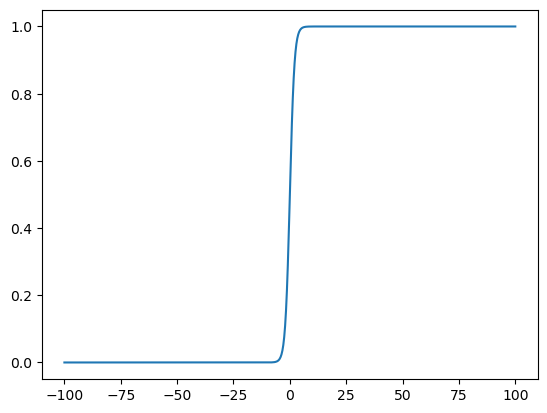

In [8]:
plt.figure()
plt.plot(x,y)
plt.show()

In [1]:
# importing the datasets 
## we will work on titanic train.csv and test.csv file
# import the libraries :
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
train_data=pd.read_csv(r'C:\Users\Admin\Desktop\it_VEDANT\My Learnbay Folder\My Learnbay Folder\Stat and ML by Utkarsha sir\ML_BY_ME\22nd Jan 2023\train.csv')

In [3]:
test_data=pd.read_csv(r'C:\Users\Admin\Desktop\it_VEDANT\My Learnbay Folder\My Learnbay Folder\Stat and ML by Utkarsha sir\ML_BY_ME\22nd Jan 2023\test.csv')

In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# 0 ----> -ve class ---->not survived
#  1-----> +ve class ----->survived

In [7]:
train_data.shape

(891, 12)

In [8]:
test_data.shape

(418, 11)

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
## We will do preprocessing and EDA simultaneously on only one data 
# so we will concat train and test 
# after preprocessing we will divide the data again

In [12]:
train_data['data']='train'
test_data['data']='test'

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [14]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,test
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,test
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,test


###  Concatenate train and test data

In [15]:
all_data=pd.concat([train_data,test_data],axis=0)

###  Preprocessing

In [16]:
all_data.shape

(1309, 13)

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [18]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [19]:
## as 1014 of 1309 records are missing from Cabin we should drop that column
all_data.drop('Cabin',axis=1,inplace=True)

In [20]:
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
data             0
dtype: int64

<Axes: ylabel='Age'>

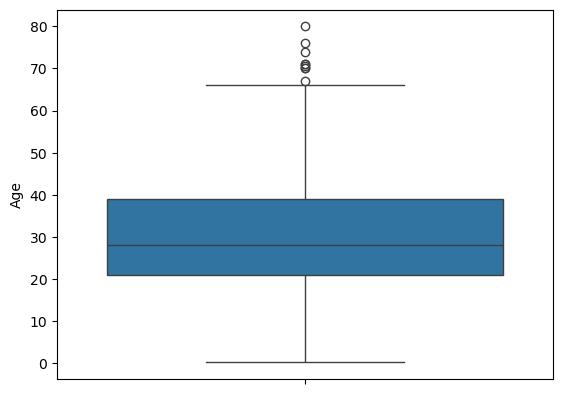

In [21]:
sns.boxplot(all_data['Age'])

In [22]:
# as there are some outliers it is good to fill null values by median
all_data['Age'].mean()

29.881137667304014

In [23]:
all_data['Age'].median()

28.0

In [24]:
all_data['Age']=all_data['Age'].fillna(all_data['Age'].median())

In [25]:
all_data.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
data             0
dtype: int64

In [26]:
# droping the unnecessary columns /Feature Engg
all_data.drop(['Name','PassengerId','Ticket','Fare'],axis=1,inplace=True)


In [27]:
all_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked      2
data          0
dtype: int64

In [28]:
all_data['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [29]:
# filling the null values of Embarked by S
all_data['Embarked']=all_data['Embarked'].fillna('S')

In [30]:
all_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked      0
data          0
dtype: int64

In [31]:
### EDA :
all_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'data'],
      dtype='object')

In [32]:
all_data['Survived'].value_counts()   # Target var

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [33]:
# imbalenced ?
# a data is set to be imbalenced if majority class >2*minority class
# 342*2=684<549
# oversampling ,undersampling

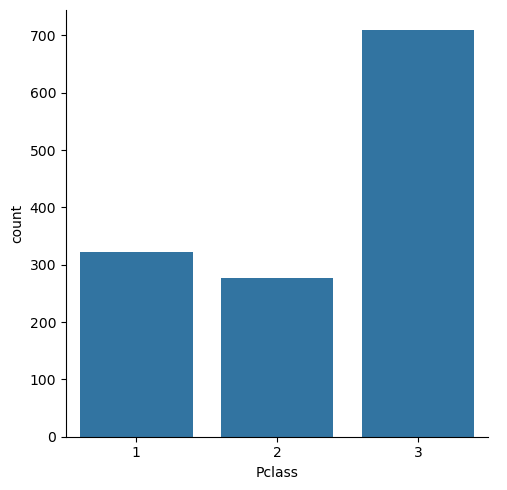

In [34]:
sns.catplot(data=all_data,x='Pclass',kind='count')
## insight : we can observe that most of the people are from P class -3

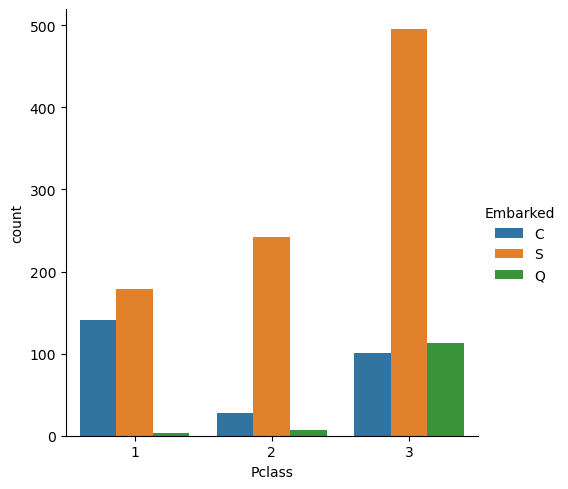

In [35]:
sns.catplot(data=all_data,x='Pclass',kind='count',hue='Embarked')

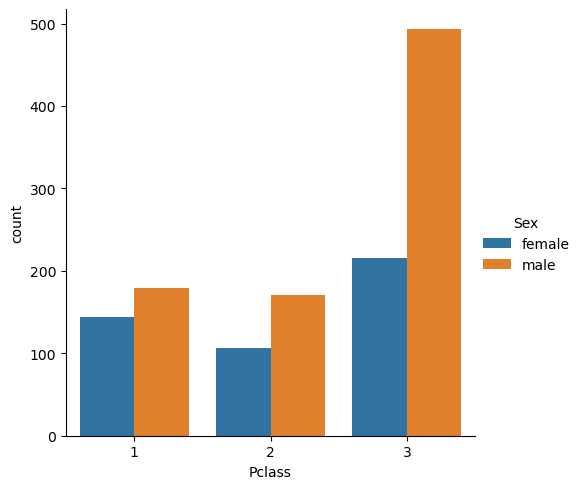

In [36]:
sns.catplot(data=all_data,x='Pclass',kind='count',hue='Sex')

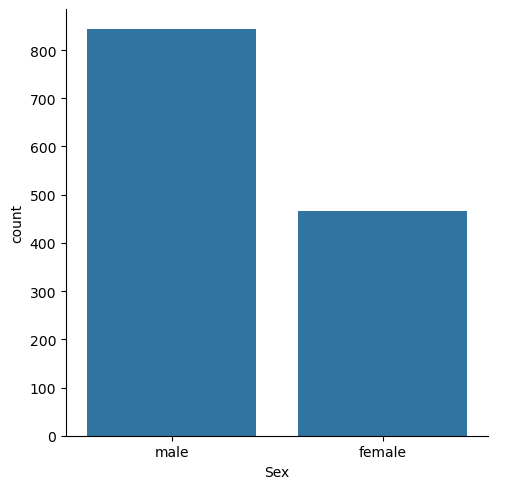

In [37]:
sns.catplot(data=all_data,x='Sex',kind='count')

In [38]:
all_data['Age'].value_counts()

Age
28.0    295
24.0     47
22.0     43
21.0     41
30.0     40
       ... 
23.5      1
70.5      1
55.5      1
20.5      1
38.5      1
Name: count, Length: 98, dtype: int64

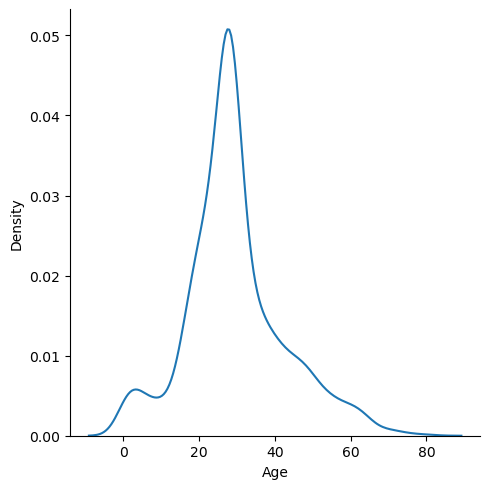

In [39]:
sns.displot(data=all_data,x='Age',kind='kde')

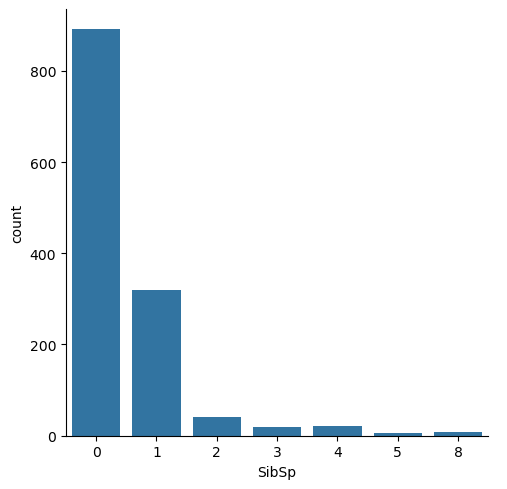

In [40]:
sns.catplot(data=all_data,x='SibSp',kind='count')

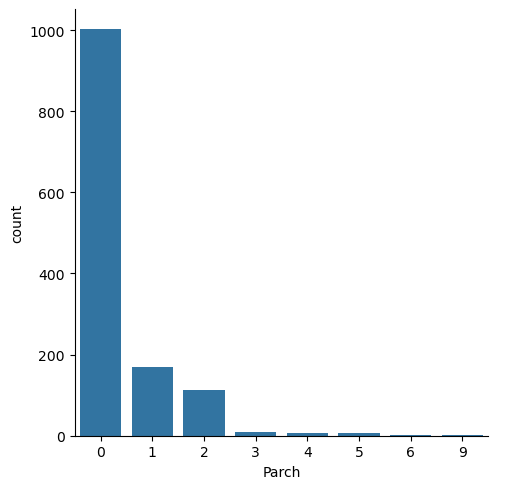

In [41]:
sns.catplot(data=all_data,x='Parch',kind='count')

In [42]:
# pandas profiling
# Here no outlier treatment is needed as there is only one numerical column Age
# and it doesnt make any sense to remove outliers from age column

## Encoding 

In [43]:
for i in all_data.columns:
    print(i,all_data[i].unique())

Survived [ 0.  1. nan]
Pclass [3 1 2]
Sex ['male' 'female']
Age [22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.   22.5  18.5  67.   76.   26.5  60.5  11.5   0.33
  0.17 38.5 ]
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6 9]
Embarked ['S' 'C' 'Q']
data ['train' 'test']


## One hot encoding for Sex ,Embarked columns

In [44]:
all_data=pd.get_dummies(all_data,columns=['Sex'],dtype='int')

In [45]:
all_data.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,data,Sex_female,Sex_male
0,0.0,3,22.0,1,0,S,train,0,1
1,1.0,1,38.0,1,0,C,train,1,0
2,1.0,3,26.0,0,0,S,train,1,0
3,1.0,1,35.0,1,0,S,train,1,0
4,0.0,3,35.0,0,0,S,train,0,1


In [46]:
all_data.drop(['Sex_female'],axis=1,inplace=True)

In [47]:
all_data.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,data,Sex_male
0,0.0,3,22.0,1,0,S,train,1
1,1.0,1,38.0,1,0,C,train,0
2,1.0,3,26.0,0,0,S,train,0
3,1.0,1,35.0,1,0,S,train,0
4,0.0,3,35.0,0,0,S,train,1


In [48]:
all_data=pd.get_dummies(all_data,columns=['Embarked'],dtype='int')

In [49]:
all_data

,Survived,Pclass,Age,SibSp,Parch,data,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22.0,1,0,train,1,0,0,1
1,1.0,1,38.0,1,0,train,0,1,0,0
2,1.0,3,26.0,0,0,train,0,0,0,1
3,1.0,1,35.0,1,0,train,0,0,0,1
4,0.0,3,35.0,0,0,train,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,28.0,0,0,test,1,0,0,1
414,NaN,1,39.0,0,0,test,0,1,0,0
415,NaN,3,38.5,0,0,test,1,0,0,1
416,NaN,3,28.0,0,0,test,1,0,0,1


In [50]:
all_data.drop(['Embarked_S'],axis=1,inplace=True)

In [51]:
all_data.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'data', 'Sex_male',
       'Embarked_C', 'Embarked_Q'],
      dtype='object')

## Preprocessing completed


In [52]:
# next to segregate the train and test data

In [53]:
all_data.head()

,Survived,Pclass,Age,SibSp,Parch,data,Sex_male,Embarked_C,Embarked_Q
0,0.0,3,22.0,1,0,train,1,0,0
1,1.0,1,38.0,1,0,train,0,1,0
2,1.0,3,26.0,0,0,train,0,0,0
3,1.0,1,35.0,1,0,train,0,0,0
4,0.0,3,35.0,0,0,train,1,0,0


In [54]:
train_data=all_data[all_data['data']=='train']

In [55]:
train_data

,Survived,Pclass,Age,SibSp,Parch,data,Sex_male,Embarked_C,Embarked_Q
0,0.0,3,22.0,1,0,train,1,0,0
1,1.0,1,38.0,1,0,train,0,1,0
2,1.0,3,26.0,0,0,train,0,0,0
3,1.0,1,35.0,1,0,train,0,0,0
4,0.0,3,35.0,0,0,train,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,train,1,0,0
887,1.0,1,19.0,0,0,train,0,0,0
888,0.0,3,28.0,1,2,train,0,0,0
889,1.0,1,26.0,0,0,train,1,1,0


In [56]:
test_data=all_data[all_data['data']=='test']

In [57]:
test_data.head()

,Survived,Pclass,Age,SibSp,Parch,data,Sex_male,Embarked_C,Embarked_Q
0,NaN,3,34.5,0,0,test,1,0,1
1,NaN,3,47.0,1,0,test,0,0,0
2,NaN,2,62.0,0,0,test,1,0,1
3,NaN,3,27.0,0,0,test,1,0,0
4,NaN,3,22.0,1,1,test,0,0,0


In [58]:
## now we should drop Survived column from test _data bcz
# it has added due to concatenation only

In [59]:
test_data.drop(['Survived','data'],inplace=True,axis=1)

In [60]:
test_data

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q
0,3,34.5,0,0,1,0,1
1,3,47.0,1,0,0,0,0
2,2,62.0,0,0,1,0,1
3,3,27.0,0,0,1,0,0
4,3,22.0,1,1,0,0,0
...,...,...,...,...,...,...,...
413,3,28.0,0,0,1,0,0
414,1,39.0,0,0,0,1,0
415,3,38.5,0,0,1,0,0
416,3,28.0,0,0,1,0,0


In [61]:
train_data.drop(['data'],inplace=True,axis=1)

In [62]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q
0,0.0,3,22.0,1,0,1,0,0
1,1.0,1,38.0,1,0,0,1,0
2,1.0,3,26.0,0,0,0,0,0
3,1.0,1,35.0,1,0,0,0,0
4,0.0,3,35.0,0,0,1,0,0


In [63]:
## Now we will split the train_data into train_test splits
# for building a model and evaluating

## Train test split

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
## Dividing the data into Target and ind variables
## Target : survived
X=train_data.drop('Survived',axis=1)  # ind
y=train_data['Survived']  # target

In [66]:
X.head()

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q
0,3,22.0,1,0,1,0,0
1,1,38.0,1,0,0,1,0
2,3,26.0,0,0,0,0,0
3,1,35.0,1,0,0,0,0
4,3,35.0,0,0,1,0,0


In [67]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

## Model Building

In [69]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [70]:
y_pred=lr.predict(x_test)
y_pred

array([0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 0.])

In [71]:
## Evaluation
from sklearn.metrics import accuracy_score
###### Training accuracy
accuracy_score(y_train,lr.predict(x_train))

0.8047752808988764

In [72]:
accuracy_score(y_test,lr.predict(x_test))

0.8156424581005587

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [74]:
### Confusion matrix
confusion_matrix(y_test,y_pred)

array([[88, 11],
       [22, 58]], dtype=int64)

In [75]:
### TPR,FPR,TNR,FNR,Precision,REcall,Specificity,F1score
## AUC ROC

In [80]:
# 
from sklearn.metrics import precision_score,recall_score
prec=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print('precision :',prec)
print('recall :',recall)
# out of 100 predicted positive 84 are correct

precision : 0.8405797101449275
recall : 0.725


In [82]:
# 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84        99
         1.0       0.84      0.72      0.78        80

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
     
## ROC - Receiver OPerating Characteristics
# It is the graph of TPR vs FPR

### AUC -Area under the curve  (80-90%)

## ROC and AUC

In [85]:
from sklearn.metrics import roc_auc_score

In [87]:
log_roc_auc_score=roc_auc_score(y_test,y_pred)
print('Area under the curve is ',log_roc_auc_score)

Area under the curve is  0.8069444444444445


In [90]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
print(fpr,tpr,threshold)

[0.         0.11111111 1.        ] [0.    0.725 1.   ] [2. 1. 0.]


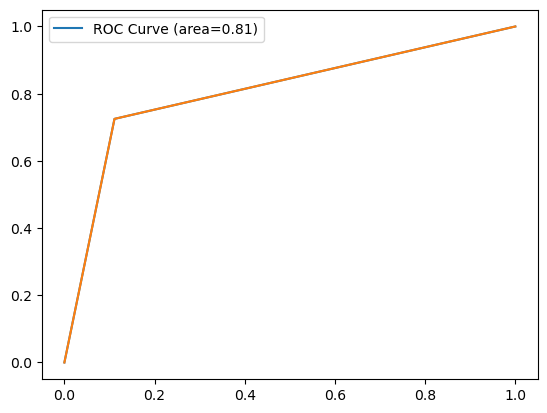

In [94]:
plt.figure()
plt.plot(fpr,tpr,label="ROC Curve (area=%0.2f)" %log_roc_auc_score)
plt.plot(fpr,tpr)
plt.legend()
plt.show()


In [95]:
######### Next to predict the result for our test_data in which no
## survived column were there
test_data.head()


,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q
0,3,34.5,0,0,1,0,1
1,3,47.0,1,0,0,0,0
2,2,62.0,0,0,1,0,1
3,3,27.0,0,0,1,0,0
4,3,22.0,1,1,0,0,0


In [96]:
y_pred_test_data=lr.predict(test_data)

In [97]:
test_data['Survived']=y_pred_test_data

In [98]:
test_data

,Pclass,Age,SibSp,Parch,Sex_male,Embarked_C,Embarked_Q,Survived
0,3,34.5,0,0,1,0,1,0.0
1,3,47.0,1,0,0,0,0,0.0
2,2,62.0,0,0,1,0,1,0.0
3,3,27.0,0,0,1,0,0,0.0
4,3,22.0,1,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,1,0,0,0.0
414,1,39.0,0,0,0,1,0,1.0
415,3,38.5,0,0,1,0,0,0.0
416,3,28.0,0,0,1,0,0,0.0
